# ECSE415 - Intro to Computer Vision
## Tutorial 9 - Introduction to Machine Learning  using Scikit-Learn


A machine learning problem consists of $n$ instances of data and attempts to predict properties of unseen data.

Learning problems can be separated into several categories:
* Supervised Learning: data comes with additional attributes that we want to predict. This problem can be either:
 * Classification: Samples belong to two or more classes and the algorithm learns from already labeled data to         predict to class of unseen data.
 * Regression: the desired output consists of one or more continuous variables.
* Unsupervised Learning: data consists of a set of input vectors without any corresponding target values. Examples include clustering, density estimation, etc.

Input data dimensions: (1797, 64)
Output data dimensions: (1797,)
Input data:


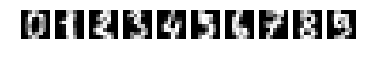

Output labels:
[0 1 2 3 4 5 6 7 8 9]


In [2]:
from sklearn import datasets
from matplotlib import pyplot as plt

digits = datasets.load_digits()

print("Input data dimensions:", digits.data.shape)
print("Output data dimensions:", digits.target.shape)

print("Input data:")
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray'); plt.axis('off')
plt.show()

print("Output labels:")
print(digits.target[0:10])

The task is to predict the output label (number from 0-9) for each input image. Since we are provided with examples of each of the 10 possible classes, we can now attempt to *fit* an estimator to be able to *predict* the classes to which unseen samples belong.

We can begin by looking at a Support Vector Machine.

Predicted Label: [0 8 9 8]
Actual Label: [0 8 9 8]


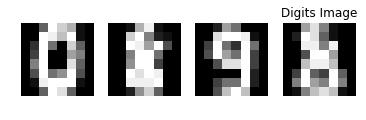

In [3]:
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

clf = svm.SVC(gamma=0.001, C=100.)
# training, let's us all the data but the last 4 instances
clf.fit(digits.data[:-4], digits.target[:-4])
# now predict the label for the last 2 instances
print("Predicted Label:", clf.predict(digits.data[-4:]))
print("Actual Label:", digits.target[-4:])

# plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(digits.data[-4].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(142), plt.imshow(digits.data[-3].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(143), plt.imshow(digits.data[-2].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(144), plt.imshow(digits.data[-1].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title("Digits Image")
plt.show()

Scikit learn also lets you save your best model to disk for future uses.

In [4]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pk1')

# load back the pickled model at a later time
clf = joblib.load('filename.pk1')

You can also update and fine-tune hyper-parameters after the model has been constructed.

In [5]:
from sklearn import svm
from sklearn import datasets

digits = datasets.load_digits()
# classifer object
clf = svm.SVC()
# set hyper-parameters
print("Linear Kernel:")
clf.set_params(kernel='linear').fit(digits.data[:-10], digits.target[:-10])
print("\tPredicted Labels:", clf.predict(digits.data[-10:]))
print("\tActual Labels:   ", digits.target[-10:])
print("")

print("Radial Basis Function Kernel:")
clf.set_params(kernel='rbf').fit(digits.data[:-10], digits.target[:-10])
print("\tPredicted Labels:", clf.predict(digits.data[-10:]))
print("\tActual Labels:   ", digits.target[-10:])

Linear Kernel:
	Predicted Labels: [5 4 8 8 4 9 0 8 9 8]
	Actual Labels:    [5 4 8 8 4 9 0 8 9 8]

Radial Basis Function Kernel:
	Predicted Labels: [5 4 5 5 4 9 5 5 5 5]
	Actual Labels:    [5 4 8 8 4 9 0 8 9 8]


Scikit learn also supports multiclass and mutlilabel fitting.

In [6]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets

digits = datasets.load_digits()
X_train = digits.data[:-10]
y_train = digits.target[:-10]
X_test = digits.data[-10:]
y_test = digits.target[-10:]

classif = OneVsRestClassifier(estimator = SVC(random_state=0))
classif.fit(X_train, y_train).predict(X_test)


array([5, 4, 3, 3, 4, 9, 0, 3, 9, 3])

In the above case, the classifier is fit on a 1d array of multiclass labels and the **predict()** method therefore provides corresponding multiclass predictions. It is also possible to fit upon a 2d array of binary label indicators:

In [7]:
y_train_binary = LabelBinarizer().fit_transform(y_train)
classif.fit(X_train, y_train_binary).predict(X_train)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

Here, the classifier is **fit()** on a 2d binary representation of **y** using the **LabelBinarizer**. In this case **predict()** returns a 2d array representing the corresponding multilabel predictions.

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In this case, the classifier is fit upon instances each assigned multiple labels. The **MultiLabelBinarizer** is used to binarize the 2d array of multilabels to **fit** upon. As a result, **predict()** returns a 2d array with multiple predicted labels for each instance.